In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function (pyplot)
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [3]:
# copy cusp demo into current directory
ac.copydemo('cusp')

# start AUTO with runner object
runner = ra.runAUTO()

# first continatuon run

# run and store result in mu
mu = ac.run(e='cusp', c='cusp', runner=runner)

# run backwards and append to mu
mu = mu + ac.run(DS='-', runner=runner)

# relabel solutions
mu = mu.relabel()

# save to b.mu, s.mu, and d.mu
ac.save(mu,'mu')

Copying demo cusp ... done
gfortran -fopenmp -O -c cusp.f90 -o cusp.o
gfortran -fopenmp -O cusp.o -o cusp.exe /auto/lib/*.o
Starting cusp ...

  BR    PT  TY  LAB       mu         L2-NORM          x           lambda    
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   1.00000E+00
   1    14  LP    2   3.84900E-01   5.77360E-01  -5.77360E-01   1.00000E+00
   1    20        3   1.26582E-01   9.29410E-01  -9.29410E-01   1.00000E+00
   1    40        4  -1.38347E+00   1.40803E+00  -1.40803E+00   1.00000E+00
   1    47  UZ    5  -1.99999E+00   1.52138E+00  -1.52138E+00   1.00000E+00

 Total Time    0.262E-01


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


cusp ... done
Starting cusp ...

  BR    PT  TY  LAB       mu         L2-NORM          x           lambda    
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   1.00000E+00
   1    14  LP    2  -3.84900E-01   5.77360E-01   5.77360E-01   1.00000E+00
   1    20        3  -1.26582E-01   9.29410E-01   9.29410E-01   1.00000E+00
   1    40        4   1.38347E+00   1.40803E+00   1.40803E+00   1.00000E+00
   1    47  UZ    5   1.99999E+00   1.52138E+00   1.52138E+00   1.00000E+00

 Total Time    0.247E-01
cusp ... done
Saving to b.mu, s.mu, and d.mu ... done


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Created plot


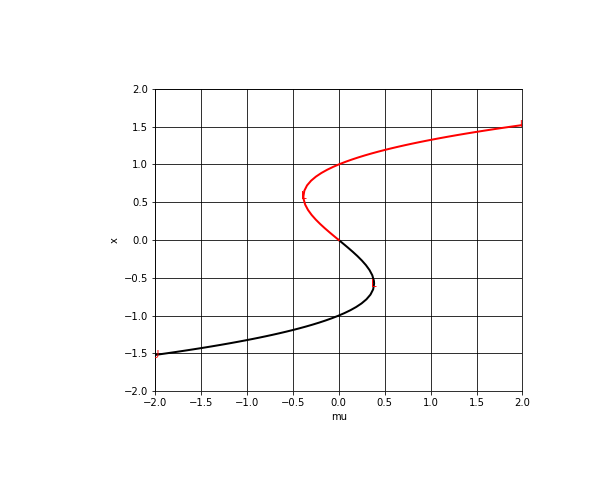

In [4]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot(mu)
p.config(bifurcation_y=['x'])
p.savefig('b.png')
display(Image.open('b.png'))

In [5]:
# second continuation run

# set new start label to first LP label in mu
lp1 = ac.load(mu('LP1'), ISW=2, runner=runner)

# continue from this label in two parameters
cusp = ac.run(lp1, runner=runner)
cusp = cusp + ac.run(DS='-', runner=runner)

# save to b.cusp, s.cusp, and d.cusp
ac.save(cusp,'cusp')

Runner configured
Starting cusp ...

  BR    PT  TY  LAB       mu         L2-NORM          x           lambda    
   2    20       11   1.09209E+00   8.17354E-01  -8.17354E-01   2.00420E+00
   2    34  UZ   12   1.99995E+00   9.99991E-01  -9.99991E-01   2.99995E+00

 Total Time    0.242E-01
cusp ... done
Starting cusp ...

  BR    PT  TY  LAB       mu         L2-NORM          x           lambda    
   2    20       11   5.42543E-02   3.00470E-01  -3.00470E-01   2.70847E-01
   2    29  CP   12  -2.02770E-12   1.00472E-04   1.00472E-04   3.02839E-08
   2    40       13  -9.09414E-02   3.56925E-01   3.56925E-01   3.82187E-01
   2    60       14  -5.73716E-01   6.59512E-01   6.59512E-01   1.30487E+00
   2    80       15  -1.68023E+00   9.43582E-01   9.43582E-01   2.67104E+00
   2    85  UZ   16  -1.99995E+00   9.99992E-01   9.99992E-01   2.99995E+00

 Total Time    0.366E-01
cusp ... done
Saving to b.cusp, s.cusp, and d.cusp ... done


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Created plot


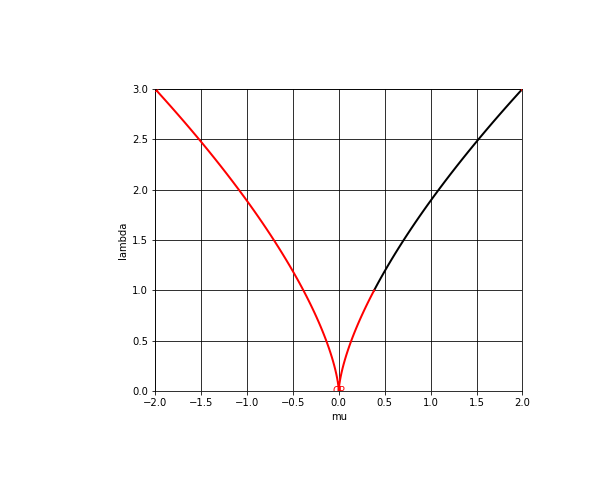

In [6]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot(cusp)
p.config(bifurcation_y=['lambda'])
p.savefig('b.png')
display(Image.open('b.png'))

In [7]:
# clean up files

ac.clean()
ac.delete('cusp')
ac.delete('mu')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.cusp ... done
Deleting s.cusp ... done
Deleting d.cusp ... done
Deleting b.mu ... done
Deleting s.mu ... done
Deleting d.mu ... done
